<blockquote>
    <h1>Exercise 7.11</h1>
    <p>In Section 7.7, it was mentioned that GAMs are generally fit using a <i>backfitting</i> approach. The idea behind backfitting is actually quite simple. We will now explore backfitting in the context of multiple linear regression.</p>
    <p>Suppose that we would like to perform multiple linear regression, but we do not have software to do so. Instead, we only have software to perform simple linear regression. Therefore, we take the following iterative approach: we repeatedly hold all but one coefficient estimate fixed at its current value, and update only that coefficient estimate using a simple linear regression. The process is continued until <i>convergence</i>—that is, until the coefficient estimates stop changing.</p>
    <p>We now try this out on a toy example.</p>
    <ol>
        <li>Generate a response $Y$ and two predictors $X_1$ and $X_2$, with
$n = 100$.</li>
        <li>Initialize $\hat{\beta}_1$ to take on a value of your choice. It does not matter what value you choose.</li>
        <li>
            Keeping $\hat{\beta}_1$ fixed, fit the model
            $$
            Y - \hat{\beta}_1 X_1 = \beta_0 + \beta_2 X_2 + \epsilon \,.
            $$
            You can do this as follows: <br>
<code>> a=y-beta1*x1
> beta2=lm(a~x2)\$coef[2]
</code>
        </li>
        <li>
            Keeping $\hat{\beta}_2$ fixed, fit the model
            $$
            Y - \hat{\beta}_2 X_2 = \beta_0 + \beta_1 X_1 + \epsilon \,.
            $$
            You can do this as follows: <br>
<code>> a=y-beta2*x2
> beta1=lm(a~x1)\$coef[2]
</code>
        </li>
        <li>Write a for loop to repeat 3 and 4 $1,000$ times. Report the estimates of $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$ at each iteration of the for loop. Create a plot in which each of these values is displayed, with $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$ each shown in a different color.</li>
        <li>Compare your answer in 5 to the results of simply performing
multiple linear regression to predict $Y$ using $X_1$ and $X_2$. Use the <code>abline()</code> function to overlay those multiple linear regression coefficient estimates on the plot obtained in 5.</li>
        <li>On this data set, how many backfitting iterations were required in order to obtain a "good" approximation to the multiple regression coefficient estimates?</li>
    </ol>
</blockquote>

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm

<h3>Exercise 7.11.1</h3>
<blockquote>
    <i>Generate a response $Y$ and two predictors $X_1$ and $X_2$, with
$n = 100$.</i>
</blockquote>

<IPython.core.display.Javascript object>


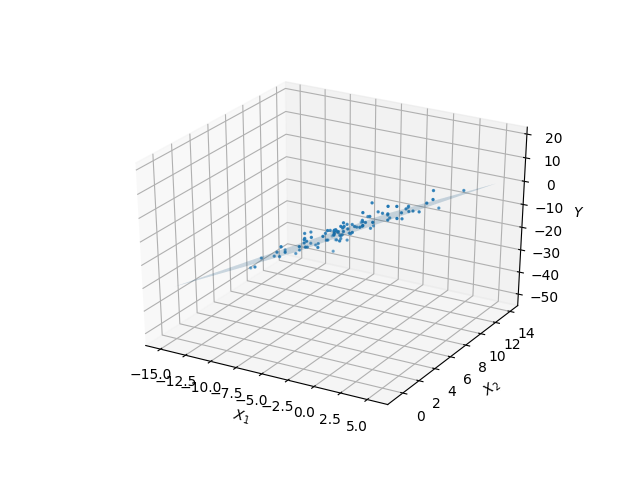

In [2]:
np.random.seed(42)
n = 100
x1 = np.random.normal(size=n, loc=-2, scale=4)
x2 = np.random.normal(size=n, loc=5, scale=3)
gaussian_noise = np.random.normal(size=n, loc=0, scale=2)

beta0 = 5.4
beta1 = 2.5
beta2 = -1.3
y = beta0 + beta1 * x1 + beta2 * x2 + gaussian_noise

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(x1, x2, y, s=2)
x_pred1 = np.linspace(-15, 5, num=201)
x_pred2 = np.linspace(0, 14, num=141)
x1_pred2, x2_pred2 = np.meshgrid(x_pred1, x_pred2)
y_pred = beta0 + beta1 * x1_pred2 + beta2 * x2_pred2
_ = ax.plot_surface(x1_pred2, x2_pred2, y_pred, alpha=0.2)
_ = ax.set_xlabel(r'$X_1$')
_ = ax.set_ylabel(r'$X_2$')
_ = ax.set_zlabel(r'$Y$')

<h3>Exercise 7.11.2</h3>
<blockquote>
    <i>Initialize $\hat{\beta}_1$ to take on a value of your choice. It does not matter what value you choose.</i>
</blockquote>

In [3]:
beta1_hat = 5.0

<h3>Exercise 7.11.3</h3>
<blockquote>
    <i>Keeping $\hat{\beta}_1$ fixed, fit the model
$$
Y - \hat{\beta}_1 X_1 = \beta_0 + \beta_2 X_2 + \epsilon \,.
$$
You can do this as follows: <br>
<code>> a=y-beta1*x1
> beta2=lm(a~x2)\$coef[2]
</code></i>
</blockquote>

In [4]:
a = y - beta1_hat * x1
x2_intercept = sm.add_constant(x2)
model = sm.OLS(a, x2_intercept)
fitted = model.fit()
beta2_hat = fitted.params[1]
beta2_hat

-0.8947213162699879

<h3>Exercise 7.11.4</h3>
<blockquote>
    <i>Keeping $\hat{\beta}_2$ fixed, fit the model
$$
Y - \hat{\beta}_2 X_2 = \beta_0 + \beta_1 X_1 + \epsilon \,.
$$
You can do this as follows: <br>
<code>> a=y-beta2*x2
> beta1=lm(a~x1)\$coef[2]
</code></i>
</blockquote>

In [5]:
a = y - beta2_hat * x2
x1_intercept = sm.add_constant(x1)
model = sm.OLS(a, x1_intercept)
fitted = model.fit()
beta1_hat = fitted.params[1]
beta1_hat

2.657468355305393

<h3>Exercise 7.11.5</h3>
<blockquote>
    <i>Write a for loop to repeat 3 and 4 $1,000$ times. Report the estimates of $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$ at each iteration of the for loop. Create a plot in which each of these values is displayed, with $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$ each shown in a different color.</i>
</blockquote>

<IPython.core.display.Javascript object>


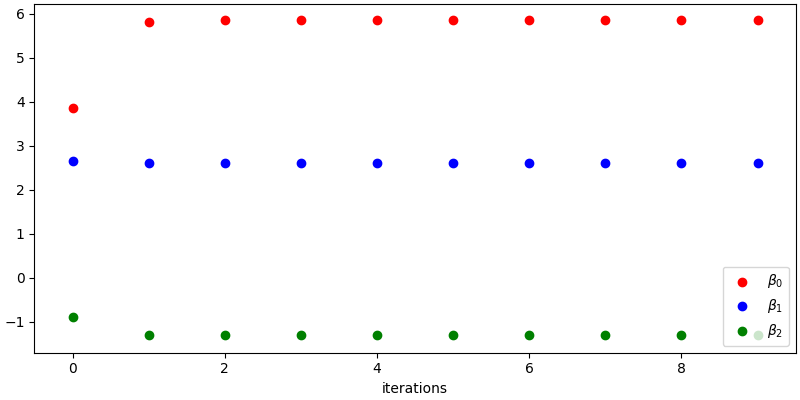

In [6]:
max_iter = 1000
beta0_hat_arr = np.zeros(shape=(max_iter, ))
beta1_hat_arr = np.zeros(shape=(max_iter, ))
beta2_hat_arr = np.zeros(shape=(max_iter, ))
beta1_hat = 5.0  # initialize
for i in range(max_iter):
    a = y - beta1_hat * x1
    fitted = sm.OLS(a, x2_intercept).fit()
    beta2_hat = fitted.params[1]
    
    a = y - beta2_hat * x2
    fitted = sm.OLS(a, x1_intercept).fit()
    beta1_hat = fitted.params[1]
    
    a = y - beta1_hat*x1 - beta2_hat*x2
    beta0_hat = np.mean(a)
    
    beta0_hat_arr[i] = beta0_hat
    beta1_hat_arr[i] = beta1_hat
    beta2_hat_arr[i] = beta2_hat
    
iterations = np.arange(max_iter)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(iterations[:10], beta0_hat_arr[:10], c='r', label=r'$\beta_0$')
_ = ax.scatter(iterations[:10], beta1_hat_arr[:10], c='b', label=r'$\beta_1$')
_ = ax.scatter(iterations[:10], beta2_hat_arr[:10], c='g', label=r'$\beta_2$')
_ = ax.set_xlabel('iterations')
_ = ax.legend(loc=4)

<h3>Exercise 7.11.6</h3>
<blockquote>
    <i>Compare your answer in 5 to the results of simply performing
multiple linear regression to predict $Y$ using $X_1$ and $X_2$. Use the <code>abline()</code> function to overlay those multiple linear regression coefficient estimates on the plot obtained in 5.</i>
</blockquote>

<IPython.core.display.Javascript object>


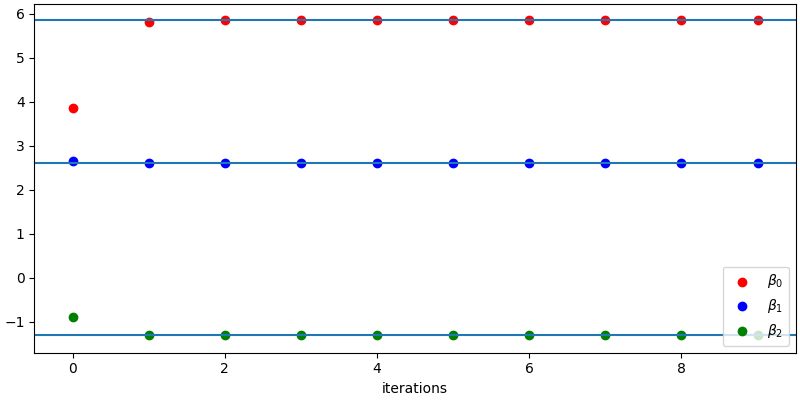

In [7]:
df_x = pd.DataFrame({
    'X1': x1,
    'X2': x2,
})
df_x.insert(0, 'Intercept', 1)

df_y = pd.DataFrame({'Y': y})
model = sm.OLS(df_y, df_x)
fitted = model.fit()

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax.scatter(iterations[:10], beta0_hat_arr[:10], c='r', label=r'$\beta_0$')
_ = ax.scatter(iterations[:10], beta1_hat_arr[:10], c='b', label=r'$\beta_1$')
_ = ax.scatter(iterations[:10], beta2_hat_arr[:10], c='g', label=r'$\beta_2$')
_ = ax.axhline(y=fitted.params.iloc[0])
_ = ax.axhline(y=fitted.params.iloc[1])
_ = ax.axhline(y=fitted.params.iloc[2])
_ = ax.set_xlabel('iterations')
_ = ax.legend(loc='lower right')

<h3>Exercise 7.11.7</h3>
<blockquote>
    <i>On this data set, how many backfitting iterations were required in order to obtain a "good" approximation to the multiple regression coefficient estimates?</i>
</blockquote>

<p>Two iterations were needed to obtain a "good" approximation.</p>